In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('/content/sample_data/thyroidDF.csv')

In [ ]:
df['on_thyroxine'].value_counts()

,count
on_thyroxine,
f,7932
t,1240


In [ ]:
df.size

284332

In [ ]:
  df.shape

(9172, 31)

In [ ]:
df.dtypes

,0
age,int64
sex,object
on_thyroxine,object
query_on_thyroxine,object
on_antithyroid_meds,object
sick,object
pregnant,object
thyroid_surgery,object
I131_treatment,object
query_hypothyroid,object


In [ ]:
df['TBG_measured'].value_counts()

,count
TBG_measured,
f,8823
t,349


In [ ]:
df['hypopituitary'].value_counts()

,count
hypopituitary,
f,9170
t,2


In [ ]:
df['referral_source'].value_counts()

,count
referral_source,
other,5493
SVI,2394
SVHC,956
STMW,255
SVHD,71
WEST,3


In [ ]:
df['target'].value_counts()/(df.shape[0])

,count
target,
-,0.738225
K,0.047536
G,0.039141
I,0.037724
F,0.025403
R,0.021369
A,0.016027
L,0.012538
M,0.012102


In [ ]:
df.isna().sum()

,0
age,0
sex,307
on_thyroxine,0
query_on_thyroxine,0
on_antithyroid_meds,0
sick,0
pregnant,0
thyroid_surgery,0
I131_treatment,0
query_hypothyroid,0


In [ ]:
df['sex'].value_counts()

,count
sex,
F,6073
M,2792


In [ ]:
diagnosed = df[df['target'] != '-']
diagnosed['target'].value_counts()

,count
target,
K,436
G,359
I,346
F,233
R,196
A,147
L,115
M,111
N,110


In [ ]:
diagnosed = diagnosed[(diagnosed['target'].isin(['A'])) | (diagnosed['target'].isin(['B'])) | (diagnosed['target'].isin(['C'])) | (diagnosed['target'].isin(['D'])) |
          (diagnosed['target'].isin(['E'])) | (diagnosed['target'].isin(['F'])) | (diagnosed['target'].isin(['G'])) | (diagnosed['target'].isin(['H']))]
diagnosed['age'].mean()
df.sort_values('age')

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
8038,1,M,f,f,f,f,f,f,f,f,...,133.0,t,1.26,t,106.0,f,NaN,STMW,G,861008071
7493,1,M,f,f,f,f,f,f,f,f,...,150.0,t,1.09,t,138.0,f,NaN,STMW,G,860826011
1142,1,M,f,f,f,f,f,f,f,f,...,100.0,t,0.93,t,107.0,f,NaN,SVI,-,841109060
1921,1,M,t,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,3.1,other,-,850306065
3300,1,NaN,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,STMW,F,850626052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7355,97,F,f,f,f,f,f,f,f,f,...,101.0,t,0.64,t,158.0,f,NaN,SVI,-,860815048
2976,455,F,f,f,f,f,f,f,f,f,...,118.0,t,1.13,t,104.0,f,NaN,SVI,-,850530001
5710,65511,M,f,f,f,f,f,f,f,f,...,113.0,t,1.08,t,104.0,f,NaN,other,-,860210008
6392,65512,M,f,f,f,f,f,f,f,f,...,112.0,t,0.84,t,133.0,f,NaN,other,-,860403050


In [ ]:
df['patient_id'].duplicated().sum() # no duplicate ids

0

In [ ]:
df = df.drop(axis=0, index=[8105,6392,5710,2976]) # dropped strange age rows
df.sort_values('age')


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
3722,1,NaN,f,f,f,f,f,f,f,f,...,113.0,t,0.86,t,131.0,f,NaN,STMW,G,850730006
1921,1,M,t,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,3.1,other,-,850306065
456,1,M,f,f,f,f,f,f,f,f,...,65.0,t,0.89,t,73.0,f,NaN,SVI,-,840919025
3300,1,NaN,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,STMW,F,850626052
1142,1,M,f,f,f,f,f,f,f,f,...,100.0,t,0.93,t,107.0,f,NaN,SVI,-,841109060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5758,95,F,f,f,f,f,f,f,f,f,...,103.0,t,0.89,t,116.0,f,NaN,SVI,K,860212049
8155,95,M,f,f,f,f,f,f,f,f,...,54.0,t,0.62,t,87.0,f,NaN,SVI,K,861016080
7356,97,M,f,f,f,f,f,f,f,f,...,93.0,t,0.89,t,104.0,t,29.0,SVI,-,860815049
790,97,F,f,f,f,f,f,f,f,f,...,84.0,t,0.97,t,87.0,f,NaN,SVI,-,841016031


In [ ]:
treatment = df[df["target"].isin(['O', 'P', 'Q'])]
treatment

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
213,33,M,f,f,f,f,f,t,f,f,...,32.0,t,0.78,t,41.0,f,NaN,SVI,Q,840830003
305,58,F,f,f,t,f,f,f,f,f,...,40.0,t,1.13,t,35.0,f,NaN,other,O,840906049
529,38,F,f,f,t,f,f,f,f,f,...,40.0,t,1.17,t,34.0,f,NaN,other,O,840925016
693,27,F,f,f,t,f,f,f,f,f,...,36.0,t,1.11,t,32.0,f,NaN,other,O,841009031
944,57,M,f,f,f,f,f,f,t,f,...,65.0,t,0.83,t,78.0,f,NaN,other,P,841025054
1003,55,F,f,f,t,f,f,f,f,f,...,44.0,t,1.03,t,43.0,f,NaN,other,O,841031042
1108,53,F,f,f,f,f,f,f,t,t,...,44.0,t,1.07,t,41.0,f,NaN,other,P,841108085
1662,15,F,f,f,f,f,f,t,f,f,...,78.0,t,0.99,t,79.0,f,NaN,SVI,Q,841214048
1753,41,F,f,f,f,f,f,t,f,f,...,93.0,t,1.16,t,80.0,f,NaN,SVI,Q,841221047
2078,37,F,f,f,f,f,f,t,f,f,...,87.0,f,NaN,f,NaN,f,NaN,other,Q,850319024


In [ ]:
df.sort_values(['T3'], ascending=False)['T3']

,T3
7224,18.000000
7693,13.299999
4853,10.599999
7367,9.500000
1733,8.900000
...,...
9167,NaN
9168,NaN
9169,NaN
9170,NaN


In [ ]:
df = df[~df['target'].str.contains('\|')]

In [ ]:
df[df['target'].str.contains('\|')]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id


In [ ]:
df['target'].value_counts()

,count
target,
-,6767
K,436
G,359
I,346
F,233
R,196
A,147
L,115
M,111


In [ ]:
# Create a new column 'concurrent illness' and assign values
df.loc[:, 'concurrent illness'] = df['target'].str.contains('K')

# Replace 'K' in the 'target' column
df.loc[:, 'target'] = df['target'].str.replace('K', '')

# Create a new column 'increased binding' and assign values
df.loc[:, 'increased binding'] = df['target'].str.contains('I')

# Replace 'I' in the 'target' column
df.loc[:, 'target'] = df['target'].str.replace('I', '')

# Create a new column 'decreased binding' and assign values
df.loc[:, 'decreased binding'] = df['target'].str.contains('J')

# Replace 'J' in the 'target' column
df.loc[:, 'target'] = df['target'].str.replace('J', '')

# Collapse Hypothyroid problems (TO E)
df.loc[:, 'target'] = df['target'].str.replace('F', 'E')
df.loc[:, 'target'] = df['target'].str.replace('G', 'E')
df.loc[:, 'target'] = df['target'].str.replace('H', 'E')
# Collapse Hyperthyroid problems (TO A)
df.loc[:, 'target'] = df['target'].str.replace('B', 'A')
df.loc[:, 'target'] = df['target'].str.replace('C', 'A')
df.loc[:, 'target'] = df['target'].str.replace('D', 'A')
# Take out R
df = df[~df['target'].str.contains('R')]

In [ ]:
df['target'].value_counts()

,count
target,
-,6767
,823
E,659
A,228
M,129
L,116
N,110
S,85
O,15


In [ ]:
df.loc[:, 'target'] = df['target'].replace('', '-')

In [ ]:
df['target'].value_counts()

,count
target,
-,7590
E,659
A,228
M,129
L,116
N,110
S,85
O,15
Q,14


Text(0.5, 1.0, 'Mean TSH of Patients by Diagnosis Group')

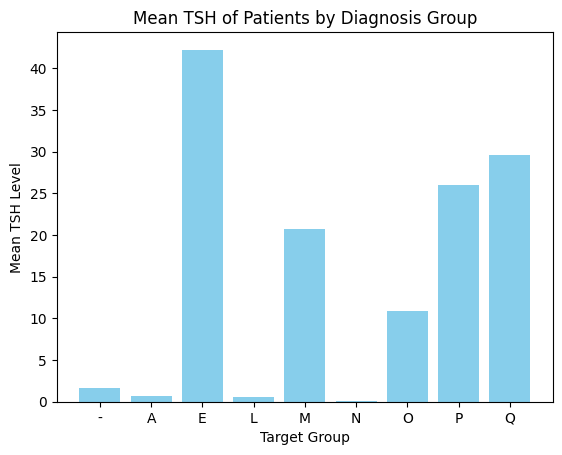

In [ ]:
tsh_exists = df[df['TSH'] != '-']
mean_TSH = tsh_exists[['target', 'TSH']].groupby(['target']).mean()
plt.bar(mean_TSH.index.astype(str), mean_TSH['TSH'], color='skyblue')
plt.xlabel("Target Group")
plt.ylabel("Mean TSH Level")
plt.title("Mean TSH of Patients by Diagnosis Group")

In [ ]:
df[df['target'] == 'N']['TSH']

,TSH
40,0.050
114,0.200
136,0.100
155,0.050
355,0.300
...,...
8245,0.035
8324,0.005
8420,0.020
8752,0.020


In [ ]:
df['concurrent illness'].value_counts()

,count
concurrent illness,
False,8386
True,565


Text(0.5, 1.0, 'Mean TSH of Patients with and without a concurrent illness')

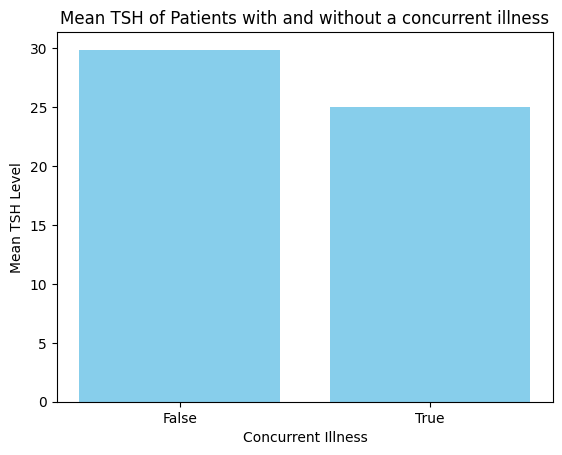

In [ ]:
mean_concurrent = df[['concurrent illness', 'TBG']].groupby(['concurrent illness']).mean()
plt.bar(mean_concurrent.index.astype(bool).astype(str), mean_concurrent['TBG'], color='skyblue')
plt.xlabel("Concurrent Illness")
plt.ylabel("Mean TSH Level")
plt.title("Mean TSH of Patients with and without a concurrent illness")

In [ ]:
df[(df['query_on_thyroxine'] == 't') & (df['on_antithyroid_meds'] == 't')] # no patients on thyroxine and antithyroid meds

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id,concurrent illness,increased binding,decreased binding


In [ ]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id,concurrent illness,increased binding,decreased binding
0,29,F,f,f,f,f,f,f,f,t,...,f,NaN,f,NaN,other,-,840801013,False,False,False
1,29,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,other,-,840801014,False,False,False
2,41,F,f,f,f,f,f,f,f,f,...,f,NaN,t,11.0,other,-,840801042,False,False,False
3,36,F,f,f,f,f,f,f,f,f,...,f,NaN,t,26.0,other,-,840803046,False,False,False
4,32,F,f,f,f,f,f,f,f,f,...,f,NaN,t,36.0,other,S,840803047,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,t,77.0,f,NaN,SVI,-,870119022,False,False,False
9168,22,M,f,f,f,f,f,f,f,f,...,t,99.0,f,NaN,SVI,-,870119023,False,False,False
9169,69,M,f,f,f,f,f,f,f,f,...,t,89.0,f,NaN,SVI,-,870119025,False,True,False
9170,47,F,f,f,f,f,f,f,f,f,...,t,88.0,f,NaN,other,-,870119027,False,False,False


In [ ]:
df['diagnosed'] = (df['target'] == 'A') | (df['target'] == 'E')

In [ ]:
df['diagnosed'].value_counts()

,count
diagnosed,
False,8064
True,887


In [ ]:
df['on_thyroxine'].value_counts()

,count
on_thyroxine,
f,7714
t,1237


In [ ]:
df[df['on_thyroxine'] == 't']['diagnosed'].value_counts()

,count
diagnosed,
False,1207
True,30


In [ ]:
df[df['diagnosed'] == True]['on_thyroxine'].value_counts()

,count
on_thyroxine,
f,857
t,30


In [ ]:
df['query_on_thyroxine'].value_counts()

,count
query_on_thyroxine,
f,8798
t,153


In [ ]:
df = df.drop(columns='target')

In [ ]:
df = df.dropna(subset=['sex'])
df['is_male'] = df['sex'] == "M"
df = df.drop(columns="sex")

In [ ]:
df = df.drop(columns=['T4U_measured', 'FTI_measured', 'TBG_measured', 'TSH_measured', 'T3_measured', 'TT4_measured', 'referral_source'])

In [ ]:
# Convert all t and f occurances to True and False
df = df.replace('f', False)
df = df.replace('t', True)

<ipython-input-147-f37a38a2ff23>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('t', True)


In [ ]:
df.isna().sum()

,0
age,0
on_thyroxine,0
query_on_thyroxine,0
on_antithyroid_meds,0
sick,0
pregnant,0
thyroid_surgery,0
I131_treatment,0
query_hypothyroid,0
query_hyperthyroid,0


In [ ]:
# drop TBG because too few values
df = df.drop(columns="TBG")

In [ ]:
df = df.drop(columns="on_thyroxine")

In [ ]:
df.to_csv('thyroid_processed.csv', index=False)

In [ ]:
# perform imputation for all other hormone levels
print('Number of null TSH values: ', df.isna().sum()['TSH'])
df['TSH'] = df['TSH'].fillna(df['TSH'].mean())
print('Number of null TSH values: ', df.isna().sum()['TSH'])

print('Number of null T3 values: ', df.isna().sum()['T3'])
df['T3'] = df['T3'].fillna(df['T3'].mean())
print('Number of null T3 values: ', df.isna().sum()['T3'])

print('Number of null TT4 values: ', df.isna().sum()['TT4'])
df['TT4'] = df['TT4'].fillna(df['TT4'].mean())
print('Number of null TT4 values: ', df.isna().sum()['TT4'])

print('Number of null T4U values: ', df.isna().sum()['T4U'])
df['T4U'] = df['T4U'].fillna(df['T4U'].mean())
print('Number of null T4U values: ', df.isna().sum()['T4U'])

print('Number of null FTI values: ', df.isna().sum()['FTI'])
df['FTI'] = df['FTI'].fillna(df['FTI'].mean())
print('Number of null FTI values: ', df.isna().sum()['FTI'])

Number of null TSH values:  811
Number of null TSH values:  0
Number of null T3 values:  2498
Number of null T3 values:  0
Number of null TT4 values:  420
Number of null TT4 values:  0
Number of null T4U values:  765
Number of null T4U values:  0
Number of null FTI values:  758
Number of null FTI values:  0


In [ ]:
target = ['diagnosed']
X = df.drop(target+['patient_id'], axis=1)
y = df[target].values.ravel()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error


In [ ]:
# apply the same analysis as before
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f' TP: {tp}    FP: {fp}\n FN: {fn}    TN: {tn}')
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'Precision: {precision:.5f}\nRecall: {recall:.5f}\nf1: {f1_score:.5f}\n')

Accuracy: 0.9284064665127021
 TP: 56    FP: 14
 FN: 110    TN: 1552
Precision: 0.80000
Recall: 0.33735
f1: 0.47458



In [ ]:
r2 = r2_score(y_test.astype(np.float32), y_pred.astype(np.float32))
print(f'R^2: {r2}')

R^2: 0.17382937669754028


In [ ]:
rmse = root_mean_squared_error(y_test.astype(np.float32), y_pred.astype(np.float32))
print(f'RMSE: {rmse}')

RMSE: 0.2675696611404419


In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_model = Lasso(alpha=1.5)
lasso_model.fit(X_train_scaled, y_train)
y_pred = lasso_model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
rmse = root_mean_squared_error(y_test.astype(np.float32), y_pred.astype(np.float32))
print(f'RMSE: {round(rmse, 5)}')
r2 = r2_score(y_test.astype(np.float32), y_pred.astype(np.float32))
print(f'R^2: {round(r2,5)}')
mae = mean_absolute_error(y_test.astype(np.float32), y_pred.astype(np.float32))
print(f'MAE: {round(mae,5)}')

RMSE: 0.2943899929523468
R^2: -6e-05
MAE: 0.17520000040531158


In [ ]:
# SVC
from sklearn.svm import SVC
svc_model = SVC(kernel='poly', degree=4)
svc_model.fit(X_train_scaled, y_train)
y_pred = svc_model.predict(X_test_scaled)

In [ ]:
# apply the same analysis as before
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f' TP: {tp}    FP: {fp}\n FN: {fn}    TN: {tn}')
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'Precision: {precision:.5f}\nRecall: {recall:.5f}\nf1: {f1_score:.5f}\n')

Accuracy: 0.9295612009237876
 TP: 60    FP: 16
 FN: 106    TN: 1550
Precision: 0.78947
Recall: 0.36145
f1: 0.49587



In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

In [ ]:
# apply the same analysis as before
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f' TP: {tp}    FP: {fp}\n FN: {fn}    TN: {tn}')
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'Precision: {precision:.5f}\nRecall: {recall:.5f}\nf1: {f1_score:.5f}\n')

Accuracy: 0.9630484988452656
 TP: 148    FP: 46
 FN: 18    TN: 1520
Precision: 0.76289
Recall: 0.89157
f1: 0.82222



In [ ]:
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
rmse = root_mean_squared_error(y_test.astype(np.float32), y_pred.astype(np.float32))
print(f'RMSE: {round(rmse, 5)}')
r2 = r2_score(y_test.astype(np.float32), y_pred.astype(np.float32))
print(f'R^2: {round(r2,5)}')
mae = mean_absolute_error(y_test.astype(np.float32), y_pred.astype(np.float32))
print(f'MAE: {round(mae,5)}')

RMSE: 0.1922300010919571
R^2: 0.57359
MAE: 0.0369499996304512


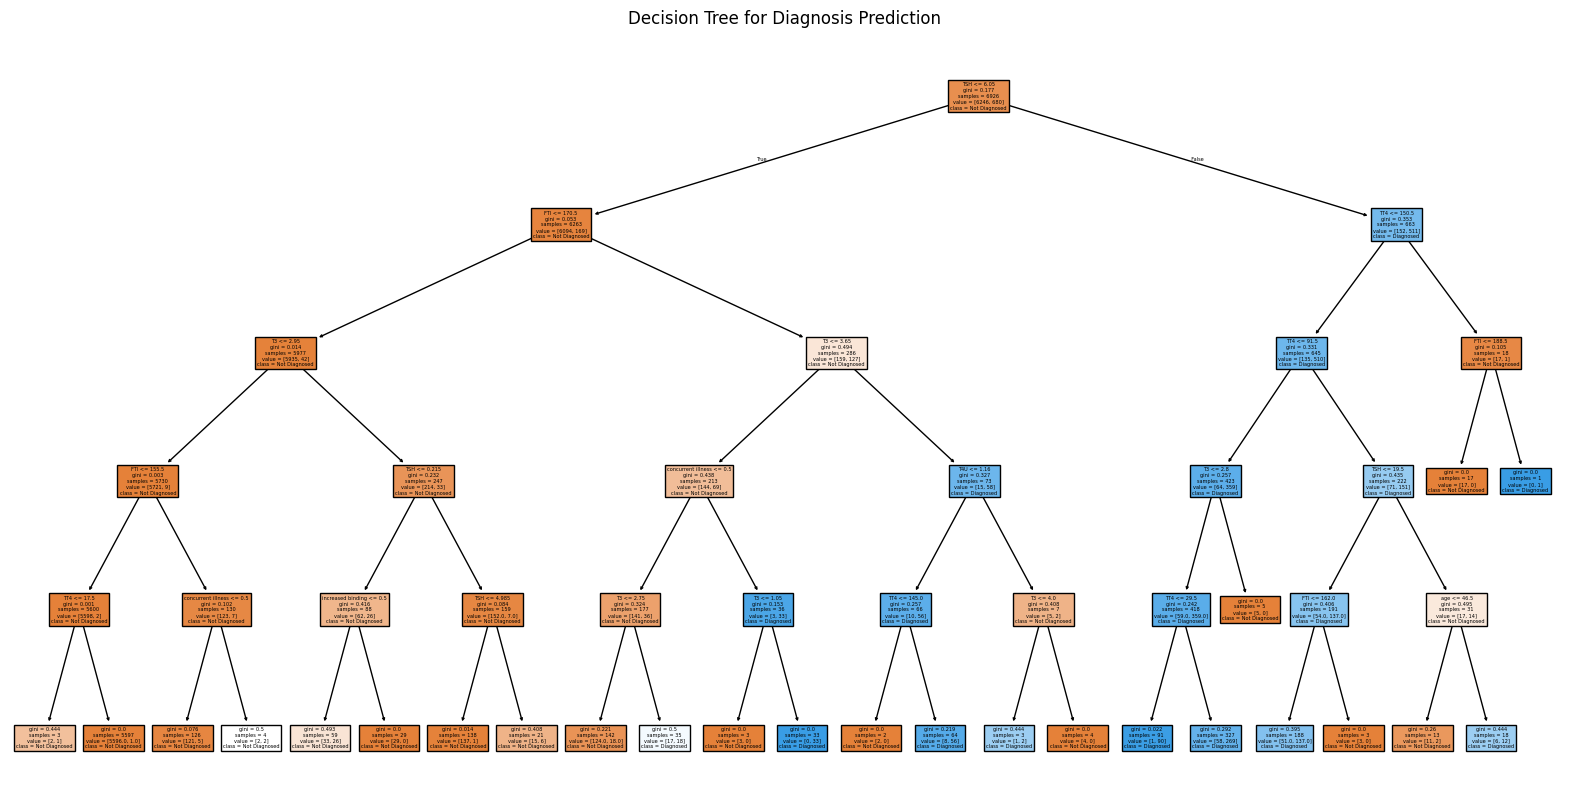

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Not Diagnosed', 'Diagnosed'])
plt.title("Decision Tree for Diagnosis Prediction")
plt.show()

In [ ]:
df_reduced = df.drop(columns=['query_on_thyroxine', 'on_antithyroid_meds', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'hypopituitary'])


<Axes: >

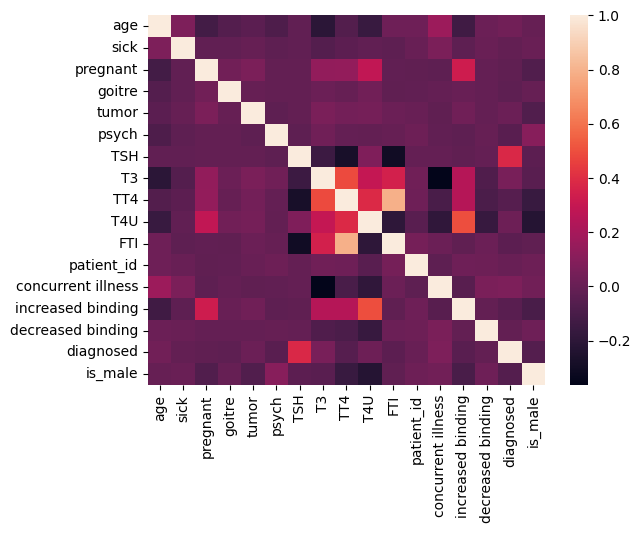

In [ ]:
sns.heatmap(df_reduced.corr())

In [ ]:
df_reduced.describe()

,age,TSH,T3,TT4,T4U,FTI,patient_id
count,8658.000000,8658.000000,8658.000000,8658.000000,8658.000000,8658.000000,8.658000e+03
mean,52.193001,5.269310,1.960211,107.862547,0.979012,111.827632,8.528962e+08
std,18.883471,23.049736,0.740831,36.035978,0.188420,34.744244,7.609451e+06
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,8.408010e+08
25%,37.000000,0.590000,1.700000,88.000000,0.870000,95.000000,8.504021e+08
50%,55.000000,1.600000,1.960211,105.000000,0.979012,111.000000,8.510010e+08
75%,68.000000,3.800000,2.100000,123.000000,1.050000,124.000000,8.607100e+08
max,97.000000,530.000000,18.000000,600.000000,2.330000,642.000000,8.701190e+08


In [ ]:
df_reduced.sort_values(by='TSH', ascending=False).head(950)

,age,sick,pregnant,goitre,tumor,psych,TSH,T3,TT4,T4U,FTI,patient_id,concurrent illness,increased binding,decreased binding,diagnosed,is_male
3075,59,False,False,False,False,False,530.0,2.000000,10.0,1.12,8.5,850606023,False,False,False,True,False
8866,19,False,False,False,False,False,500.0,0.500000,5.0,1.19,4.0,861215009,False,False,False,True,False
7219,81,False,False,False,False,False,494.0,0.500000,12.0,1.39,9.0,860806082,False,False,False,True,False
5181,18,False,False,False,False,False,478.0,1.960211,45.0,1.30,34.0,851122052,False,False,False,True,False
4854,25,False,False,False,False,False,468.0,0.700000,21.0,1.10,19.0,851028008,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5024,80,False,False,False,False,False,5.3,2.000000,86.0,1.02,83.0,851111050,False,False,False,False,False
8583,58,False,False,False,False,False,5.3,1.960211,120.0,0.95,126.0,861120039,False,False,False,False,True
7807,80,False,False,False,False,False,5.3,1.100000,97.0,0.87,112.0,860918025,True,False,False,False,False
5943,75,False,False,False,False,False,5.3,1.960211,98.0,0.75,130.0,860226020,False,False,False,False,False


In [ ]:
target = ['diagnosed']
X = df_reduced.drop(target+['patient_id'], axis=1)
y = df_reduced[target].values.ravel()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

,age,sick,pregnant,goitre,tumor,psych,TSH,T3,TT4,T4U,FTI,concurrent illness,increased binding,decreased binding,is_male
3595,46,False,False,False,False,False,3.20000,1.200000,122.000000,0.940000,131.000000,False,False,False,True
8211,51,False,False,False,False,False,0.03500,4.300000,167.000000,1.020000,164.000000,False,False,False,False
5588,23,False,False,False,False,False,0.25500,1.400000,113.000000,0.979012,111.827632,False,False,False,False
2997,71,False,False,False,False,False,0.00500,2.200000,93.000000,0.870000,107.000000,False,False,False,True
951,51,False,False,False,True,False,0.40000,1.600000,88.000000,1.050000,85.000000,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4591,84,False,False,False,False,True,3.60000,0.600000,82.000000,0.740000,110.000000,True,False,False,True
8362,65,False,False,False,False,False,1.90000,1.960211,86.000000,0.860000,100.000000,False,False,False,True
5121,60,False,False,False,False,False,5.26931,2.200000,107.862547,0.979012,111.827632,False,False,False,False
3404,34,False,False,False,False,False,3.10000,1.800000,94.000000,0.979012,111.827632,False,False,False,False


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

In [ ]:
# apply the same analysis as before
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f' TP: {tp}    FP: {fp}\n FN: {fn}    TN: {tn}')
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'Precision: {precision:.5f}\nRecall: {recall:.5f}\nf1: {f1_score:.5f}\n')

Accuracy: 0.9630484988452656
 TP: 148    FP: 46
 FN: 18    TN: 1520
Precision: 0.76289
Recall: 0.89157
f1: 0.82222



In [ ]:
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
rmse = root_mean_squared_error(y_test.astype(np.float32), y_pred.astype(np.float32))
print(f'RMSE: {round(rmse, 5)}')
r2 = r2_score(y_test.astype(np.float32), y_pred.astype(np.float32))
print(f'R^2: {round(r2,5)}')
mae = mean_absolute_error(y_test.astype(np.float32), y_pred.astype(np.float32))
print(f'MAE: {round(mae,5)}')

RMSE: 0.1922300010919571
R^2: 0.57359
MAE: 0.0369499996304512


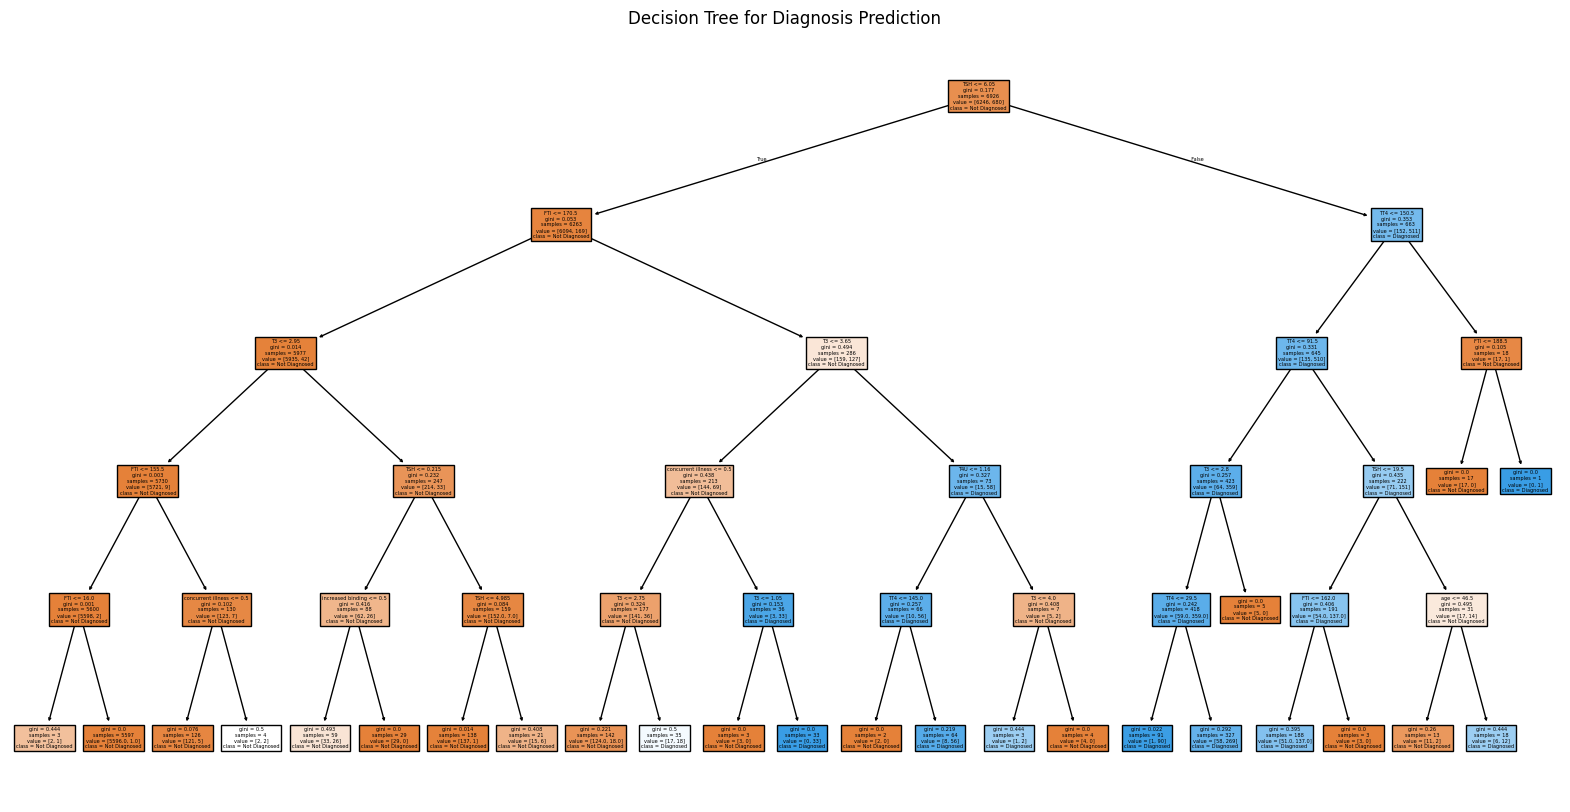

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Not Diagnosed', 'Diagnosed'])
plt.title("Decision Tree for Diagnosis Prediction")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f' TP: {tp}    FP: {fp}\n FN: {fn}    TN: {tn}')
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'Precision: {precision:.5f}\nRecall: {recall:.5f}\nf1: {f1_score:.5f}\n')

Accuracy: 0.9474595842956121
 TP: 97    FP: 22
 FN: 69    TN: 1544
Precision: 0.81513
Recall: 0.58434
f1: 0.68070



In [ ]:
df_reduced

,age,sick,pregnant,goitre,tumor,psych,TSH,T3,TT4,T4U,FTI,patient_id,concurrent illness,increased binding,decreased binding,diagnosed,is_male
0,29,False,False,False,False,False,0.30000,1.960211,107.862547,0.979012,111.827632,840801013,False,False,False,False,False
1,29,False,False,False,False,False,1.60000,1.900000,128.000000,0.979012,111.827632,840801014,False,False,False,False,False
2,41,False,False,False,False,False,5.26931,1.960211,107.862547,0.979012,111.827632,840801042,False,False,False,False,False
3,36,False,False,False,False,False,5.26931,1.960211,107.862547,0.979012,111.827632,840803046,False,False,False,False,False
4,32,False,False,False,False,False,5.26931,1.960211,107.862547,0.979012,111.827632,840803047,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,False,False,False,False,False,5.26931,1.960211,64.000000,0.830000,77.000000,870119022,False,False,False,False,True
9168,22,False,False,False,False,False,5.26931,1.960211,91.000000,0.920000,99.000000,870119023,False,False,False,False,True
9169,69,False,False,False,False,False,5.26931,1.960211,113.000000,1.270000,89.000000,870119025,False,True,False,False,True
9170,47,False,False,False,False,False,5.26931,1.960211,75.000000,0.850000,88.000000,870119027,False,False,False,False,False
